<a href="https://colab.research.google.com/github/duongtrung/Pytorch-tutorials/blob/main/12_pytorch_detectron2_object_detection_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Brief introduction

official Git: [detectron2](https://github.com/facebookresearch/detectron2)

Detectron2 is Facebook AI Research's next generation library that provides state-of-the-art detection and segmentation algorithms. It is the successor of Detectron and maskrcnn-benchmark. It supports a number of computer vision research projects and production applications in Facebook.

For MacOS and Unix users: conda install -c conda-forge detectron2

<img src="resources/Detectron2-Logo-Horz.png" width="500">

## For Windows users

By the time of this tutorial (**09.2022**) the Detectron2 does not officially support Windows OS.
It is a git tricky to install detectron2

For windows user, read this blog
https://medium.com/@yogeshkumarpilli/how-to-install-detectron2-on-windows-10-or-11-2021-aug-with-the-latest-build-v0-5-c7333909676f

However, the blog's content might be outdated.
Note from my installation

- Microsoft Visual C++ 14.0 or greater is required: https://visualstudio.microsoft.com/visual-cpp-build-tools/
Do not install Visual Studio 2022. Try either 2017 or 2019 version. I tried Visual Studio 2019 version 16.11.19. https://learn.microsoft.com/en-us/visualstudio/releases/2019/release-notes
- I have a RTX 3080 graphic card. I install CUDA Toolkits 11.3.
- If you get nvcc.exe' failed with exit code 1, do the following steps:
    - Edit PATH to where nvcc.exe (CUDA 11.3) is. For example, I copy to C:\CUDA\v11.3\bin
    - Open the detectron2\layers\csrc\nms_rotated\nms_rotated_cuda.cu file, and comment the two ifdef statements. See https://github.com/facebookresearch/detectron2/issues/1601

In [2]:
# import some common detectron2 utilities
import torch, detectron2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2 import model_zoo

from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import os, json, cv2, random

In [3]:
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

torch:  1.12 ; cuda:  1.12.1
detectron2: 0.6


In [4]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Mar_21_19:24:09_Pacific_Daylight_Time_2021
Cuda compilation tools, release 11.3, V11.3.58
Build cuda_11.3.r11.3/compiler.29745058_0


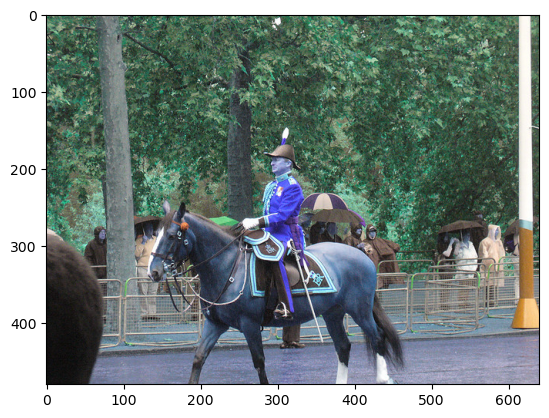

In [7]:
im = cv2.imread("resources/000000439715.jpg")
plt.imshow(im)
plt.show()

### We create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [ ]:
# obtain detectron2's default config
cfg = get_cfg()
# load the pre trained model from Detectron2 model zoo
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
# set confidence threshold for this model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  
# load model weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
# create the predictor for pose estimation using the config
pose_detector = DefaultPredictor(cfg)